In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from skimage.io import imshow
import matplotlib.image as mpimg
#%matplotlib inline

In [64]:
# Input data files consisting of the images
pics = np.load("olivetti_faces.npy")
labels = np.load("olivetti_faces_target.npy")

In [65]:
print("pics: ", pics.shape)  #400 imagens de 64pixeis x 64pixeis
print("labels: ", labels.shape)

pics:  (400, 64, 64)
labels:  (400,)


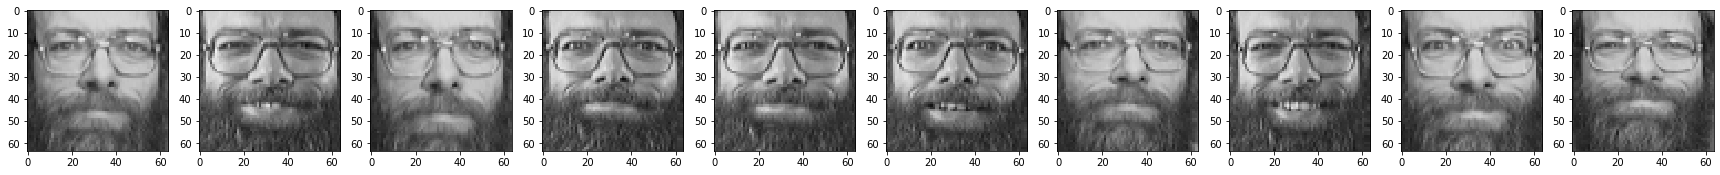

In [66]:
# Sample images of a subject
img_cnt = 10
plt.figure(figsize=(24,24))
for i in range(img_cnt):
    plt.subplot(1,10,i+1)
    x=pics[i+360] # 4th subject
    imshow(x)
plt.show()

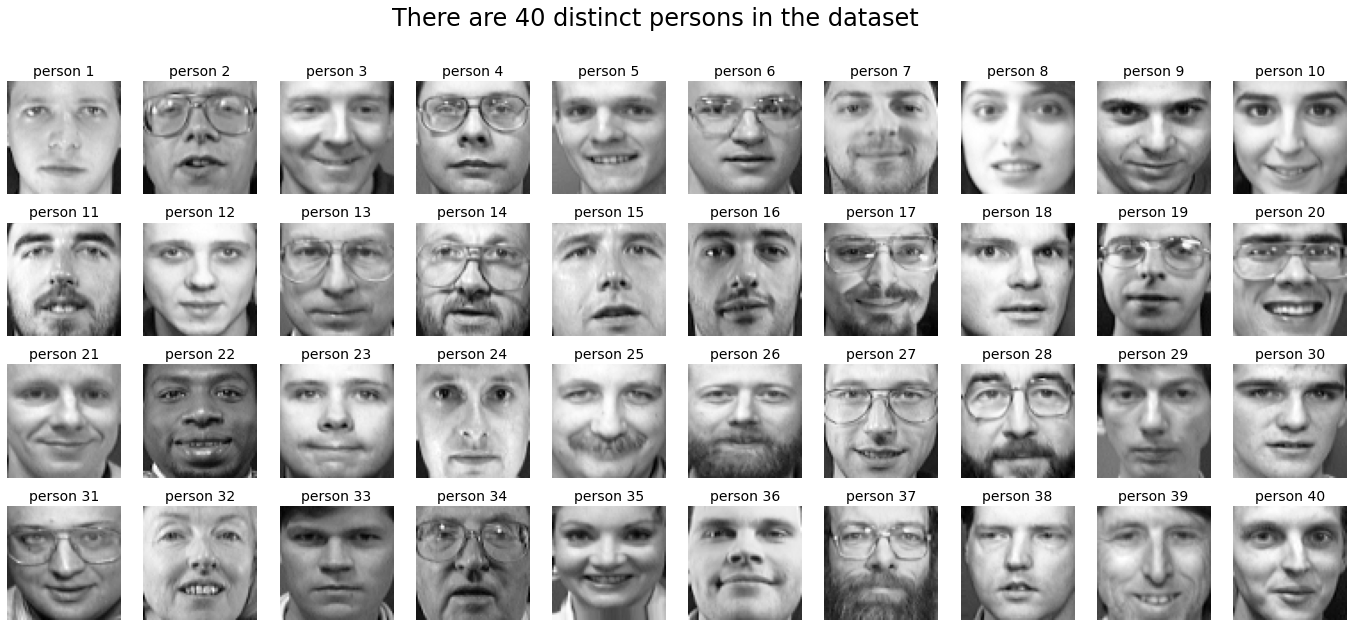

In [67]:
fig = plt.figure(figsize=(24, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=14)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct persons in the dataset", fontsize=24)
plt.show()

In [68]:
#Machine learning models can work on vectors. Since the image data is in the matrix form, it must be converted to a vector.

Y = labels.reshape(-1,1) # store labels in Y
X=pics.reshape(pics.shape[0], pics.shape[1]*pics.shape[2]) # reshape and store images in X

print("X shape:",X.shape)
print("Y shape:",Y.shape)

X shape: (400, 4096)
Y shape: (400, 1)


The data set contains 10 face images for each subject. Of the face images, 80 percent will be used for training, 20 percent for testing. Uses stratify feature to have equal number of training and test images for each subject. Thus, there will be 8 training images and 2 test images for each subject. You can play with training and test rates.

In [69]:
#Split data for train and test purposes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (320, 4096)
x_test:  (80, 4096)
y_train:  (320, 1)
y_test:  (80, 1)


In [70]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []

In [71]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []

In [72]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
LR_accuracy = round(lr.score(x_test, y_test)*100,2)

print("LR_accuracy is %", LR_accuracy)

list_names.append("Logistic Regression")
list_accuracy.append(LR_accuracy)

/home/renato/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LR_accuracy is % 96.25


/home/renato/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 400, random_state = 2)
rf.fit(x_train, y_train)
RF_accuracy = round(rf.score(x_test, y_test)*100,2)

print("RF_accuracy is %", RF_accuracy)

list_names.append("Random Forest")
list_accuracy.append(RF_accuracy)

<ipython-input-73-e09467836b63>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RF_accuracy is % 95.0


In [74]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(x_train, y_train)
Knn_accuracy = round(Knn.score(x_test, y_test)*100,2)

print("Knn_accuracy is %", Knn_accuracy)

list_names.append("KNN")
list_accuracy.append(Knn_accuracy)

<ipython-input-74-0ecd5f53d2a0>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  Knn.fit(x_train, y_train)


Knn_accuracy is % 91.25


In [75]:
df = pd.DataFrame({'METHOD': list_names, 'ACCURACY (%)': list_accuracy})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()

,METHOD,ACCURACY (%)
0,KNN,91.25
1,Random Forest,95.00
2,Logistic Regression,96.25
